Simple Transformer - Nolan Coetzee NEED MORE DATA Model is STRONG! but only 29 paragraphs is nothing. I will now try pre-trained models like GPT2

In [1]:
!pip install scikeras

In [2]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [5]:

# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [7]:
import pandas as pd

# Replace 'Username' with your actual Windows username
# Assumes the file is directly on the Desktop
file_path = r"C:\Users\nmcoe\OneDrive\Desktop\Data3.csv"
df = pd.read_csv(file_path, encoding='cp1252')  # Windows-1252
print(f"Loaded {len(df)} entries")
print(df.head())

Loaded 29 entries
                                                Data
0  George Washington, the first President of the ...
1  George Washington, often called the Father of ...
2  George Washington, revered for his leadership,...
3  George Washington, known for his military and ...
4  George Washington, the first President of the ...


In [8]:
df_sub = df[[
    "Data"
]]

# Display the first few rows of the subset DataFrame
df_sub.head()

,Data
0,"George Washington, the first President of the ..."
1,"George Washington, often called the Father of ..."
2,"George Washington, revered for his leadership,..."
3,"George Washington, known for his military and ..."
4,"George Washington, the first President of the ..."


In [9]:
!pip uninstall numpy
!pip install numpy==1.26.4
!pip install --user -U nltk
!pip install --user -U numpy
import nltk

^C
^C


   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
   ---------- ----------------------------- 3.9/15.5 MB 26.0 MB/s eta 0:00:01
   ---------------------- ----------------- 8.9/15.5 MB 32.5 MB/s eta 0:00:01
   ---------------------------------------- 15.5/15.5 MB 29.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.3
    Uninstalling numpy-2.2.3:
      Successfully uninstalled numpy-2.2.3


  You can safely remove it manually.
  You can safely remove it manually.


   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ------------ --------------------------- 3.9/12.6 MB 26.2 MB/s eta 0:00:01
   ----------------------------------- ---- 11.3/12.6 MB 30.7 MB/s eta 0:00:01
   ---------------------------------------- 12.6/12.6 MB 29.3 MB/s eta 0:00:00


In [46]:
import nltk
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from collections import OrderedDict

# Ensure NLTK resources are downloaded
nltk.download('punkt_tab')
nltk.download('punkt')

# Example DataFrame (replace with your actual df_sub)
# df_sub = pd.DataFrame({'Data': ['George is running.', 'She walks fast, okay.']})

# Tokenize each row
def tokenize_phrase(text):
    return word_tokenize(text)

df_sub['tokens'] = df_sub['Data'].apply(tokenize_phrase)

# Create word-to-ID mapping
all_words = [word for seq in df_sub['tokens'] for word in seq]
unique_words = list(OrderedDict.fromkeys(all_words))  # Remove duplicates while preserving order
word_to_id = {word: idx + 1 for idx, word in enumerate(unique_words)}  # IDs from 1
vocab_size = len(unique_words) + 1  # +1 for padding token 0
id_to_word = {idx: word for word, idx in word_to_id.items()}  # Reverse mapping

# Convert tokens to ID sequences
df_sub['sequence_ids'] = df_sub['tokens'].apply(lambda seq: [word_to_id[word] for word in seq])

print(df_sub[['Data', 'tokens', 'sequence_ids']].head())
overall_max_token = max(max(seq) for seq in df_sub['sequence_ids'])
print("The highest token in sequence_ids is:", overall_max_token)

                                                Data  \
0  George Washington, the first President of the ...   
1  George Washington, often called the Father of ...   
2  George Washington, revered for his leadership,...   
3  George Washington, known for his military and ...   
4  George Washington, the first President of the ...   

                                              tokens  \
0  [George, Washington, ,, the, first, President,...   
1  [George, Washington, ,, often, called, the, Fa...   
2  [George, Washington, ,, revered, for, his, lea...   
3  [George, Washington, ,, known, for, his, milit...   
4  [George, Washington, ,, the, first, President,...   

                                        sequence_ids  
0  [1, 2, 3, 4, 5, 6, 7, 4, 8, 9, 3, 10, 11, 12, ...  
1  [1, 2, 3, 48, 49, 4, 50, 7, 36, 51, 3, 52, 4, ...  
2  [1, 2, 3, 69, 45, 65, 70, 3, 52, 4, 5, 6, 7, 4...  
3  [1, 2, 3, 79, 45, 65, 80, 29, 81, 70, 3, 52, 4...  
4  [1, 2, 3, 4, 5, 6, 7, 4, 8, 9, 3, 52, 89, 14, ..

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\nmcoe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nmcoe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
### WITH BEGGINING ZERO

import numpy as np

# Determine maximum sequence length
max_len = max(len(seq) for seq in df_sub['sequence_ids'])  # 7

# Pad sequences
def pad_sequence(seq, max_len):
    return seq + [0] * (max_len - len(seq))

df_sub['padded_sequence'] = df_sub['sequence_ids'].apply(lambda seq: pad_sequence(seq, max_len))

# Add leading zero to each sequence in X
def add_leading_zero(seq):
    return [0] + seq[:-1]  # Shift right and add 0 at the start

df_sub['shifted_sequence'] = df_sub['padded_sequence'].apply(add_leading_zero)

# Create X
X = np.array(df_sub['shifted_sequence'].tolist())

# Create target sequences (shifted X)
y = np.array([seq[1:] + [0] for seq in df_sub['shifted_sequence'].tolist()])  # Shift left

# Output results
print("X:", X)
print("y:", y)




AttributeError: 'builtin_function_or_method' object has no attribute 'y'

In [30]:
from sklearn.model_selection import train_test_split
#Split the dataset into training and testing sets test_size using 0.3: 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#Display the shapes of the resulting datasets
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)

Training Features Shape: (20, 70)
Testing Features Shape: (9, 70)
Training Target Shape: (20, 70)
Testing Target Shape: (9, 70)


In [31]:
X_train

array([[  0,  90,   4, ...,  40,  41,  42],
       [  0,   1,   2, ...,   0,   0,   0],
       [  0, 161, 162, ...,   0,   0,   0],
       ...,
       [  0,   2,  63, ...,   0,   0,   0],
       [  0, 151, 152, ...,   0,   0,   0],
       [  0,   1,   2, ...,   0,   0,   0]], shape=(20, 70))

Nueral Network


In [32]:
y_train

array([[ 90,   4,   5, ...,  41,  42,   0],
       [  1,   2,   3, ...,   0,   0,   0],
       [161, 162, 106, ...,   0,   0,   0],
       ...,
       [  2,  63,  64, ...,   0,   0,   0],
       [151, 152, 106, ...,   0,   0,   0],
       [  1,   2,   3, ...,   0,   0,   0]], shape=(20, 70))

In [40]:
pip install torch


   ---------------------------------------- 0.0/204.1 MB ? eta -:--:--
   ---------------------------------------- 2.4/204.1 MB 16.8 MB/s eta 0:00:13
   - -------------------------------------- 9.4/204.1 MB 26.7 MB/s eta 0:00:08
   -- ------------------------------------- 14.7/204.1 MB 25.7 MB/s eta 0:00:08
   ---- ----------------------------------- 22.8/204.1 MB 32.1 MB/s eta 0:00:06
   ----- ---------------------------------- 29.9/204.1 MB 33.3 MB/s eta 0:00:06
   -------- ------------------------------- 42.2/204.1 MB 35.3 MB/s eta 0:00:05
   ---------- ----------------------------- 51.1/204.1 MB 36.6 MB/s eta 0:00:05
   ------------ --------------------------- 61.9/204.1 MB 38.7 MB/s eta 0:00:04
   -------------- ------------------------- 72.6/204.1 MB 40.3 MB/s eta 0:00:04
   ---------------- ----------------------- 83.4/204.1 MB 41.5 MB/s eta 0:00:03
   ----------------- ---------------------- 91.2/204.1 MB 41.3 MB/s eta 0:00:03
   ------------------- ------------------- 100.9/20

In [47]:
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

# -------------------------
# Positional Encoding Module
# -------------------------
def get_positional_encoding(max_len, d_model):
    """
    Returns a tensor of shape (1, max_len, d_model) containing the positional encodings.
    """
    pe = torch.zeros(max_len, d_model)
    position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
    div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
    pe[:, 0::2] = torch.sin(position * div_term)
    pe[:, 1::2] = torch.cos(position * div_term)
    pe = pe.unsqueeze(0)  # Shape: (1, max_len, d_model)
    return pe

# -------------------------
# Transformer Model
# -------------------------
class SimpleTransformer(nn.Module):
    def __init__(self, vocab_size, d_model=128, max_len=70):
        """
        vocab_size: size of vocabulary (number of tokens)
        d_model: embedding dimension and model size
        max_len: maximum sequence length (should match your padded sequence length)
        """
        super(SimpleTransformer, self).__init__()
        self.vocab_size = vocab_size
        self.d_model = d_model
        self.max_len = max_len
        
        # Embedding layer for tokens
        self.embedding = nn.Embedding(vocab_size, d_model)
        
        # Pre-computed positional encoding (registered as a buffer)
        self.register_buffer('pe', get_positional_encoding(max_len, d_model))
        
        # Linear layers for computing queries, keys, and values
        self.W_q = nn.Linear(d_model, d_model)
        self.W_k = nn.Linear(d_model, d_model)
        self.W_v = nn.Linear(d_model, d_model)
        
        # Feed-forward network
        self.ff1 = nn.Linear(d_model, d_model)
        self.ff2 = nn.Linear(d_model, vocab_size)
        
        # Layer normalization
        self.layer_norm = nn.LayerNorm(d_model)
    
    def forward(self, x):
        """
        x: tensor of shape (batch_size, seq_len) with token indices
        """
        batch_size, seq_len = x.size()
        # Lookup token embeddings and add positional encoding
        x = self.embedding(x)  # (batch_size, seq_len, d_model)
        x = x + self.pe[:, :seq_len, :]  # Broadcast positional encoding
        
        # Compute queries, keys, and values
        Q = self.W_q(x)  # (batch_size, seq_len, d_model)
        K = self.W_k(x)  # (batch_size, seq_len, d_model)
        V = self.W_v(x)  # (batch_size, seq_len, d_model)
        
        # Compute scaled dot-product attention scores
        scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(self.d_model)  # (batch_size, seq_len, seq_len)
        
        # Create a causal mask to prevent tokens from attending to future tokens
        mask = torch.triu(torch.ones(seq_len, seq_len, device=x.device), diagonal=1).bool()
        scores = scores.masked_fill(mask, float('-inf'))
        
        # Apply softmax to get attention weights and compute the attended values
        attn_weights = F.softmax(scores, dim=-1)
        attended = torch.matmul(attn_weights, V)  # (batch_size, seq_len, d_model)
        
        # Add residual connection and apply layer normalization
        x = self.layer_norm(x + attended)
        
        # Feed-forward network with ReLU activation
        hidden = F.relu(self.ff1(x))
        output = self.ff2(hidden)  # (batch_size, seq_len, vocab_size)
        return output

# -------------------------
# Training Setup
# -------------------------
def train_model(model, optimizer, criterion, X_tensor, y_tensor, num_epochs=100, batch_size=32):
    model.train()
    loss_history = []
    num_samples = X_tensor.size(0)
    for epoch in range(num_epochs):
        permutation = torch.randperm(num_samples)
        epoch_loss = 0.0
        for i in range(0, num_samples, batch_size):
            indices = permutation[i:i + batch_size]
            batch_X = X_tensor[indices]
            batch_y = y_tensor[indices]
            
            optimizer.zero_grad()
            output = model(batch_X)  # (batch_size, seq_len, vocab_size)
            # Reshape outputs and targets for CrossEntropyLoss:
            loss = criterion(output.view(-1, model.vocab_size), batch_y.view(-1))
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        avg_loss = epoch_loss / ((num_samples // batch_size) + 1)
        loss_history.append(avg_loss)
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")
    return loss_history

def plot_loss(loss_history):
    plt.plot(range(1, len(loss_history) + 1), loss_history, label='Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss Over Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()

# -------------------------
# Example Usage
# -------------------------
# Suppose you already have your training data as NumPy arrays:
# X: shape (num_samples, seq_len), containing token IDs (integer values)
# y: shape (num_samples, seq_len), containing target token IDs
# For demonstration, let's create some dummy data:
num_samples = 100
seq_len = 50  # This should be <= max_len defined for the model
vocab_size = 330  # Set according to your actual vocabulary size

# Generate random token IDs as dummy data
X = np.random.randint(0, vocab_size, (num_samples, seq_len))
y = np.random.randint(0, vocab_size, (num_samples, seq_len))

# Convert NumPy arrays to PyTorch tensors (use torch.long for token indices)
X_tensor = torch.tensor(X, dtype=torch.long)
y_tensor = torch.tensor(y, dtype=torch.long)




Epoch 1/100, Loss: 5.8284
Epoch 2/100, Loss: 5.7763
Epoch 3/100, Loss: 5.7394
Epoch 4/100, Loss: 5.7218
Epoch 5/100, Loss: 5.6877
Epoch 6/100, Loss: 5.6711
Epoch 7/100, Loss: 5.6325
Epoch 8/100, Loss: 5.6033
Epoch 9/100, Loss: 5.5610
Epoch 10/100, Loss: 5.5140
Epoch 11/100, Loss: 5.4887
Epoch 12/100, Loss: 5.4123
Epoch 13/100, Loss: 5.4033
Epoch 14/100, Loss: 5.3689
Epoch 15/100, Loss: 5.3172
Epoch 16/100, Loss: 5.2974
Epoch 17/100, Loss: 5.2228
Epoch 18/100, Loss: 5.1951
Epoch 19/100, Loss: 5.1322
Epoch 20/100, Loss: 5.0072
Epoch 21/100, Loss: 5.0472
Epoch 22/100, Loss: 4.9496
Epoch 23/100, Loss: 4.9000
Epoch 24/100, Loss: 4.8447
Epoch 25/100, Loss: 4.7797
Epoch 26/100, Loss: 4.6660
Epoch 27/100, Loss: 4.6397
Epoch 28/100, Loss: 4.5264
Epoch 29/100, Loss: 4.4101
Epoch 30/100, Loss: 4.3607
Epoch 31/100, Loss: 4.2799
Epoch 32/100, Loss: 4.1514
Epoch 33/100, Loss: 4.1745
Epoch 34/100, Loss: 4.0473
Epoch 35/100, Loss: 3.9624
Epoch 36/100, Loss: 3.8702
Epoch 37/100, Loss: 3.7985
Epoch 38/1

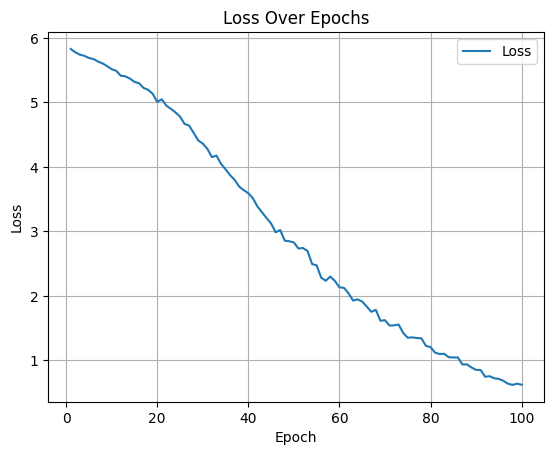

Predictions: tensor([[244, 132,  36,  ...,  34, 263, 269],
        [254, 253, 245,  ...,  33,  53,  18],
        [137, 250,  52,  ...,  55, 138, 231],
        ...,
        [257,  86,  30,  ..., 130, 244, 276],
        [ 66, 232,  89,  ..., 138, 177, 216],
        [100,  97, 226,  ..., 194,  70,  74]])


In [48]:
#Model and Training
# Instantiate the model, optimizer, and loss function
model = SimpleTransformer(vocab_size=vocab_size, d_model=128, max_len=seq_len)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Train the model
loss_history = train_model(model, optimizer, criterion, X_tensor, y_tensor,
                           num_epochs=100, batch_size=32)

# Plot the loss over epochs
plot_loss(loss_history)

# -------------------------
# Prediction Example
# -------------------------
def predict(model, X_tensor):
    model.eval()
    with torch.no_grad():
        output = model(X_tensor)  # (batch_size, seq_len, vocab_size)
        predictions = torch.argmax(output, dim=-1)
    return predictions

# Predict on the training data (for demonstration)
predictions = predict(model, X_tensor)
print("Predictions:", predictions)

In [49]:
# Generation loop using the PyTorch model
model.eval()  # Set the model to evaluation mode

max_tokens = 20
# Get the end token ID (using '.' as the end token)
end_token = word_to_id.get('.', vocab_size - 1)  # Adjust if needed
initial_tokens = [word_to_id.get(word, 0) for word in ['George', 'Washington']]
generated_tokens = initial_tokens.copy()

# Initialize context: pad on the left if the context is shorter than max_len
if len(initial_tokens) < seq_len:
    padded_context = [0] * (seq_len - len(initial_tokens)) + initial_tokens
else:
    padded_context = initial_tokens[-seq_len:]

# Autoregressive generation loop
for _ in range(max_tokens):
    # Prepare input: a tensor of shape (1, seq_len) with our token IDs
    input_tensor = torch.tensor([padded_context], dtype=torch.long)
    
    with torch.no_grad():
        # Forward pass: output shape -> (1, seq_len, vocab_size)
        output = model(input_tensor)
    
    # Get the probabilities/logits of the last time step and choose the token with maximum score
    last_logits = output[0, -1, :]  # shape: (vocab_size,)
    predicted_token = torch.argmax(last_logits).item()
    
    generated_tokens.append(predicted_token)
    
    # Update context: remove the oldest token and append the predicted token
    padded_context = padded_context[1:] + [predicted_token]
    
    # If the predicted token is the end token, break early
    if predicted_token == end_token:
        break

# Convert the generated tokens back into words using id_to_word mapping
word_sequence = ' '.join(id_to_word.get(token, "UNKNOWN") for token in generated_tokens)
print(f"Generated sequence (token IDs): {generated_tokens}")
print(f"Word sequence: {word_sequence}")


Generated sequence (token IDs): [1, 2, 266, 30, 35, 230, 205, 86, 127, 139, 205, 310, 321, 216, 320, 228, 153, 263, 30, 101, 14, 244]
Word sequence: George Washington leading later government planter further leave stable central further immeasurable ideals understood term excessive were took later peaceful in place
